<div style="direction: rtl; white-space: pre-wrap; line-height: 1.5;">


## ✅ مرحله اول: معرفی کامل پروژه

### 🔹 نام پروژه:

**"SmartLead: AI-Powered Lead Scoring System"**

### 🔹 نام فایل ژوپیتر:

**`smartlead_lead_scoring.ipynb`**

---

### 🧠 موضوع پروژه:

در این پروژه می‌خواهیم یک مدل یادگیری ماشین طراحی کنیم که بتواند **ارزش سرنخ‌های فروش (Leads)** را **پیش‌بینی** کند. یعنی بر اساس ویژگی‌های مختلفی که از هر سرنخ (lead) در اختیار داریم، بفهمیم که کدام سرنخ‌ها احتمال بیشتری برای تبدیل شدن به مشتری دارند و کدام‌ها کمتر.

---

### 🎯 هدف نهایی:

* **ساخت یک مدل طبقه‌بندی (Classification Model)** برای پیش‌بینی این‌که آیا یک سرنخ ارزش پیگیری دارد یا خیر.
* **استفاده از متریک‌های ارزیابی کاربردی** مثل:

  * **AUC (Area Under the Curve)** برای بررسی توانایی مدل در تفکیک مثبت‌ها و منفی‌ها.
  * **F1-score** برای تعادل بین Precision و Recall.
* **تحلیل ویژگی‌ها (Feature Importance)** برای اینکه بفهمیم کدام ویژگی‌ها بیشترین تاثیر را در پیش‌بینی دارند.
* **ارائه داشبورد ساده و گرافیکی** از نتایج و امتیازدهی به سرنخ‌ها.

---

### 📊 داده‌ها:

داده‌ها شامل ویژگی‌های مختلفی از سرنخ‌ها خواهند بود؛ مثل:

* منبع سرنخ (source)
* صنعت (industry)
* اندازه شرکت
* نقش تصمیم‌گیرنده
* تعاملات قبلی
* وضعیت بازاریابی (marketing score)
* و خروجی هدف (target): تبدیل شده به مشتری (1) یا نه (0)

---

### ⚒️ مهارت‌هایی که در طول پروژه کار می‌کنیم:

| مهارت              | توضیح                                          |
| ------------------ | ---------------------------------------------- |
| Classification     | مدل‌سازی برای پیش‌بینی دسته‌بندی سرنخ‌ها       |
| Feature Importance | تحلیل اینکه کدام ویژگی‌ها بیشترین اثر را دارند |
| Model Evaluation   | مقایسه مدل‌ها با متریک‌هایی مثل F1 و AUC       |

---

### 🧠 میزان تطابق پروژه با سطح شما: 8/10

پروژه مناسب کسی هست که تا حدی با مفاهیم اولیه مدل‌سازی آشناست، اما درک عمیق‌تری از **business metrics** مثل conversion rate، ROI و... هم نیاز داره.



</div>

### dataset
https://www.kaggle.com/ashydv/leads-dataset

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Kaggle Leads Dataset
# Note: Replace 'path_to_file/leads.csv' with the actual path to your downloaded CSV file
df = pd.read_csv('dataset/leads.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0 

In [3]:
# Display dataset info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                 

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper A

In [5]:
# Replace 'Select' with NaN in columns that contain 'Select' as missing values
columns_with_select = ['Lead Profile', 'City', 'Specialization', 'How did you hear about X Education']
for col in columns_with_select:
    df[col] = df[col].replace('Select', np.nan)

# Display missing values after replacing 'Select'
print("\nMissing Values after replacing 'Select':")
print(df.isnull().sum())

# Handle missing values
# 1. Drop columns with too many missing values (>40%)
columns_to_drop = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                   'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
df = df.drop(columns=columns_to_drop)

# 2. Fill missing values for numerical columns with median
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

# 3. Fill missing values for categorical columns with mode
df['Lead Source'] = df['Lead Source'].fillna(df['Lead Source'].mode()[0])
df['Last Activity'] = df['Last Activity'].fillna(df['Last Activity'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Specialization'] = df['Specialization'].fillna(df['Specialization'].mode()[0])
df['How did you hear about X Education'] = df['How did you hear about X Education'].fillna(df['How did you hear about X Education'].mode()[0])
df['What is your current occupation'] = df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0])
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0])
df['Tags'] = df['Tags'].fillna(df['Tags'].mode()[0])
df['Lead Profile'] = df['Lead Profile'].fillna(df['Lead Profile'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])

# Display missing values after handling
print("\nMissing Values after handling:")
print(df.isnull().sum())


Missing Values after replacing 'Select':
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                

In [6]:
print(df['Lead Source'].mode()[0])  # پرتکرارترین مقدار Lead Source
print(df['City'].mode()[0])        # پرتکرارترین مقدار City

Google
Mumbai


### EDA

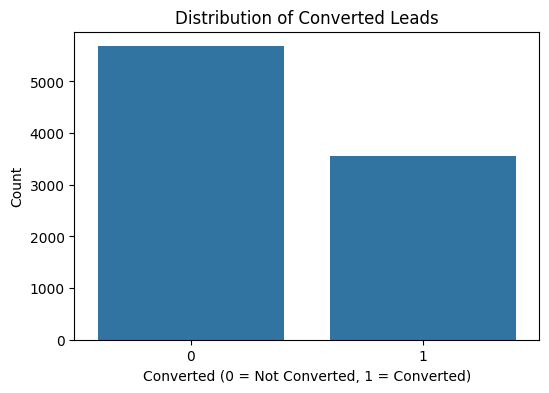

In [7]:
# Plot the distribution of the target variable (Converted)
plt.figure(figsize=(6, 4))
sns.countplot(x='Converted', data=df)
plt.title('Distribution of Converted Leads')
plt.xlabel('Converted (0 = Not Converted, 1 = Converted)')
plt.ylabel('Count')
plt.show()

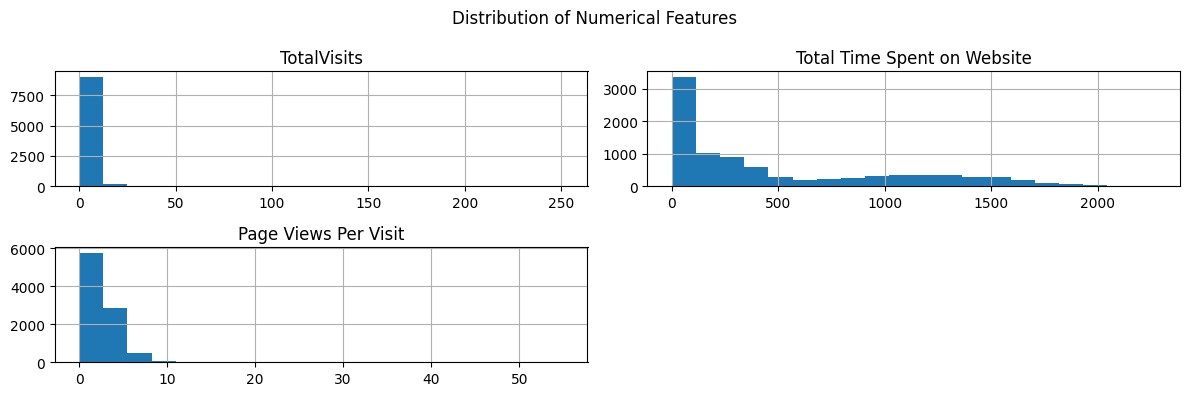

In [8]:
# Plot histograms for numerical features
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df[numerical_cols].hist(figsize=(12, 4), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

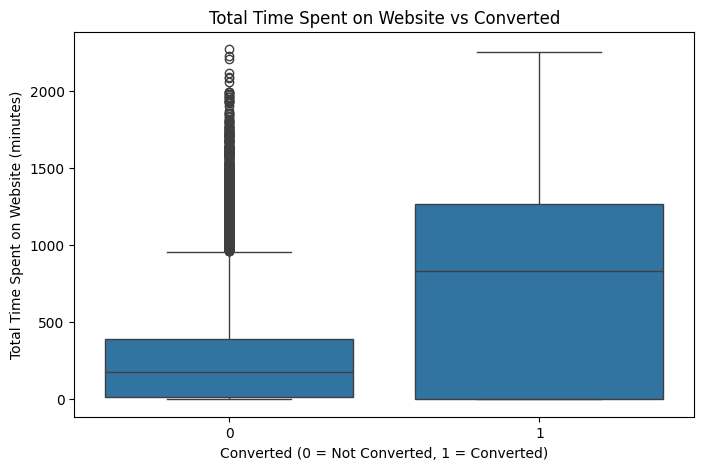

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=df)
plt.title('Total Time Spent on Website vs Converted')
plt.xlabel('Converted (0 = Not Converted, 1 = Converted)')
plt.ylabel('Total Time Spent on Website (minutes)')
plt.show()

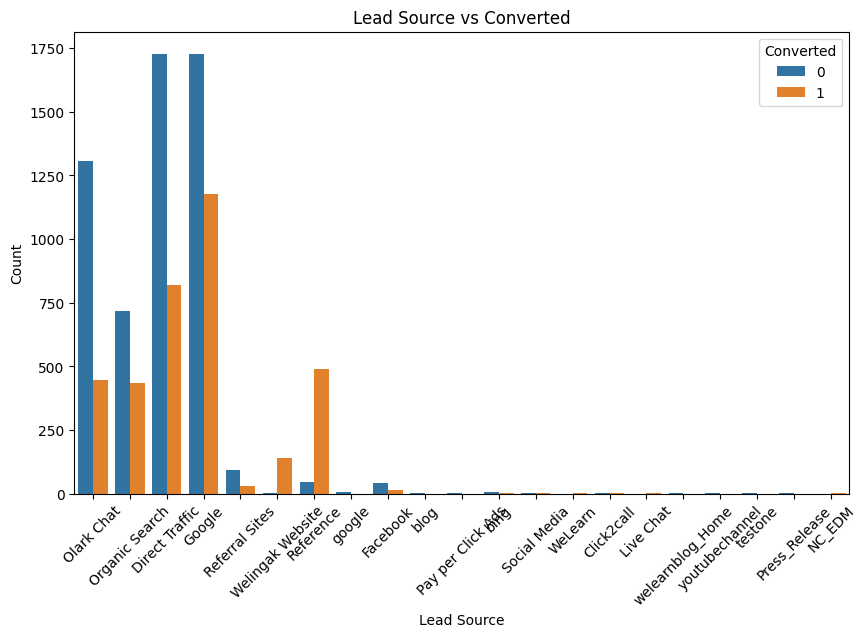

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Lead Source', hue='Converted', data=df)
plt.title('Lead Source vs Converted')
plt.xlabel('Lead Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
from sklearn.preprocessing import OneHotEncoder



# Select categorical columns to encode
categorical_cols = ['Lead Source', 'Last Activity', 'Country', 'Specialization', 
                   'How did you hear about X Education', 'What is your current occupation', 
                   'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
encoded_cols = encoder.fit_transform(df[categorical_cols])

# Get the feature names from the encoder
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_feature_names)

# Drop the original categorical columns from df
df = df.drop(columns=categorical_cols)

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Display the first few rows to check
print(df.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

  Do Not Email Do Not Call  Converted  TotalVisits  \
0           No          No          0          0.0   
1           No          No          0          5.0   
2           No          No          1          2.0   
3           No          No          0          1.0   
4           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit Search  ...  \
0                            0                   0.0     No  ...   
1                          674                   2.5

In [12]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaled_cols = scaler.fit_transform(df[numerical_cols])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_cols, columns=numerical_cols)

# Drop the original numerical columns from df
df = df.drop(columns=numerical_cols)

# Concatenate the scaled columns with the original DataFrame
df = pd.concat([df, scaled_df], axis=1)

# Display the first few rows to check
print(df.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

  Do Not Email Do Not Call  Converted Search Magazine Newspaper Article  \
0           No          No          0     No       No                No   
1           No          No          0     No       No                No   
2           No          No          1     No       No                No   
3           No          No          0     No       No                No   
4           No          No          1     No       No                No   

  X Education Forums  ... Lead Profile_Potential Lead  \
0    

In [13]:
# Import necessary libraries
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset (assuming it's already processed from previous steps)
# If you ran cell 1 and 2, use the updated df instead of reloading
# df = pd.read_csv('dataset/leads.csv')  # Uncomment only if starting fresh

# Define columns to keep (numerical and encoded ones)
columns_to_keep = ['Converted'] + [col for col in df.columns if col.startswith(('Total', 'Lead Source_', 'Last Activity_', 'Country_', 'Specialization_', 
                   'How did you hear about X Education_', 'What is your current occupation_', 
                   'What matters most to you in choosing a course_', 'Tags_', 'Lead Profile_', 'City_'))]

# Filter the DataFrame to keep only selected columns
df = df[columns_to_keep]

# Fill missing values
# For numerical columns (already scaled, but check for NaN)
numerical_cols = [col for col in df.columns if col.startswith('Total')]
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
# For encoded categorical columns
encoded_cols = [col for col in df.columns if col not in ['Converted'] + numerical_cols]
if encoded_cols:
    df[encoded_cols] = df[encoded_cols].fillna(df[encoded_cols].mode().iloc[0])

# Separate features (X) and target (y)
X = df.drop(columns=['Converted'])  # All columns except the target
y = df['Converted']  # Target variable

# Initialize SelectKBest with f_classif (for classification)
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features

# Fit and transform the data
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask].tolist()

# Update the DataFrame with selected features
df_selected = pd.DataFrame(X_selected, columns=selected_features)
df = pd.concat([df_selected, y.reset_index(drop=True)], axis=1)

# Display the first few rows and selected features
print("Selected Features:", selected_features)
print(df.head())

Selected Features: ['Lead Source_Reference', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Total Time Spent on Website']
   Lead Source_Reference  Last Activity_Olark Chat Conversation  \
0                    0.0                                    0.0   
1                    0.0                                    0.0   
2                    0.0                                    0.0   
3                    0.0                                    0.0   
4                    0.0                                    0.0   

   Last Activity_SMS Sent  What is your current occupation_Unemployed  \
0                     0.0                                         1.0   
1                     0.0                                         1.0   
2         


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1136
           1       0.81      0.79      0.80       712

    accuracy                           0.85      1848
   macro avg       0.84      0.84      0.84      1848
weighted avg       0.85      0.85      0.85      1848


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1136
           1       0.78      0.75      0.77       712

    accuracy                           0.82      1848
   macro avg       0.82      0.81      0.81      1848
weighted avg       0.82      0.82      0.82      1848


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1136
           1       0.82      0.77      0.79       712

    accuracy                           0.85      1848
  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:03:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


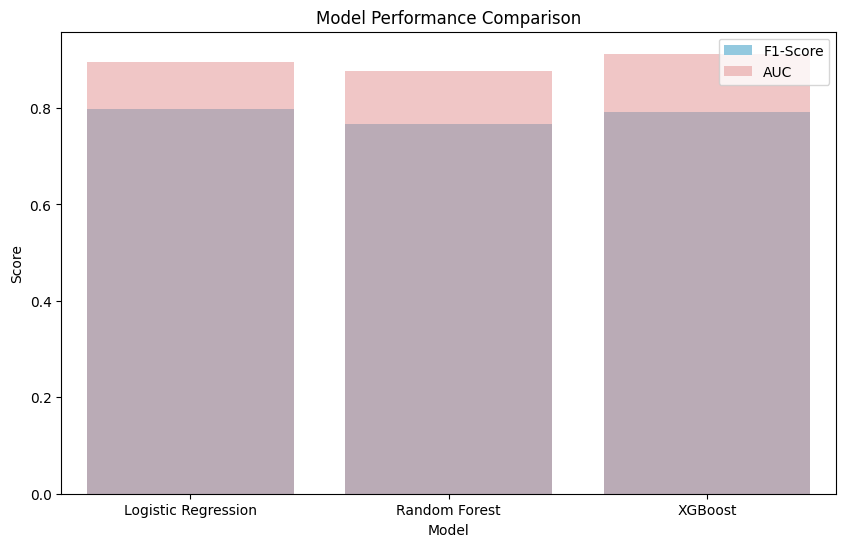


Model Performance Summary:
                 Model  F1-Score       AUC
0  Logistic Regression  0.797729  0.894630
1        Random Forest  0.767025  0.877646
2              XGBoost  0.792754  0.912716


In [14]:
# Import necessary libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import xgboost as xgb

# Ensure the DataFrame only contains selected features and target
selected_features = [
    'Lead Source_Reference', 
    'Last Activity_Olark Chat Conversation', 
    'Last Activity_SMS Sent', 
    'What is your current occupation_Unemployed', 
    'What is your current occupation_Working Professional', 
    'Tags_Closed by Horizzon', 
    'Tags_Interested in other courses', 
    'Tags_Ringing', 
    'Tags_Will revert after reading the email', 
    'Total Time Spent on Website'
]
X = df[selected_features]  # Features (only selected ones)
y = df['Converted']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store evaluation metrics
results = {'Model': [], 'F1-Score': [], 'AUC': []}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Store results
    results['Model'].append(model_name)
    results['F1-Score'].append(f1)
    results['AUC'].append(auc)
    
    # Print classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot comparison of models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=results_df, color='skyblue', label='F1-Score')
sns.barplot(x='Model', y='AUC', data=results_df, color='lightcoral', alpha=0.5, label='AUC')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend()
plt.show()

# Display results
print("\nModel Performance Summary:")
print(results_df)

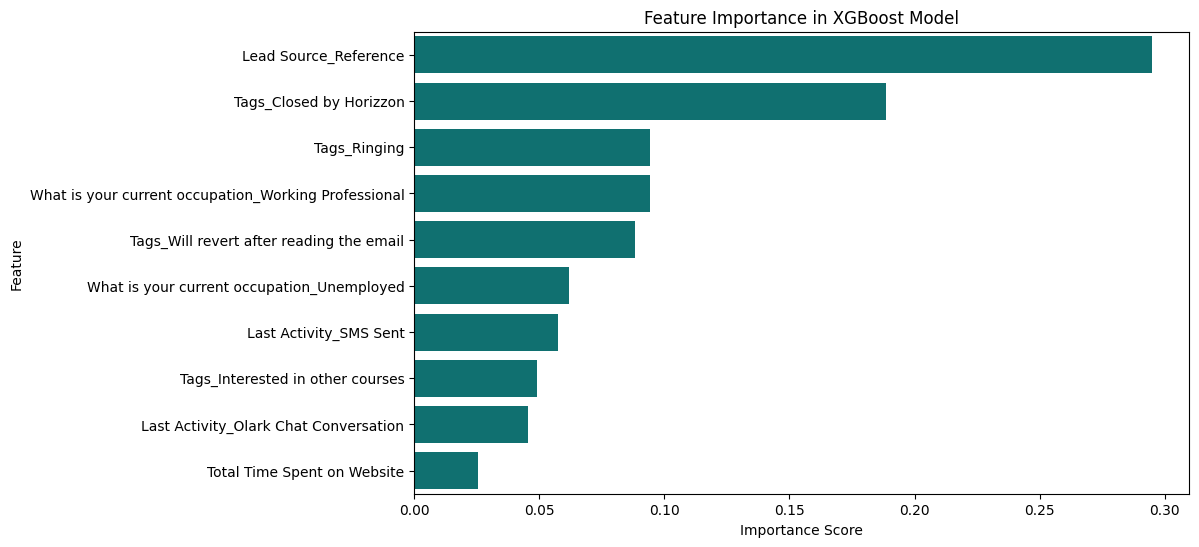


Feature Importance Summary:
                                             Feature  Importance
0                              Lead Source_Reference    0.295008
5                            Tags_Closed by Horizzon    0.188544
7                                       Tags_Ringing    0.094453
4  What is your current occupation_Working Profes...    0.094113
8           Tags_Will revert after reading the email    0.088322
3         What is your current occupation_Unemployed    0.061974
2                             Last Activity_SMS Sent    0.057480
6                   Tags_Interested in other courses    0.048907
1              Last Activity_Olark Chat Conversation    0.045486
9                        Total Time Spent on Website    0.025714


In [15]:
import xgboost as xgb

# Use the trained XGBoost model from the previous step
# Assuming the XGBoost model is stored in 'models' dictionary with key 'XGBoost'
model_xgb = models['XGBoost']

# Get feature importance
feature_importance = model_xgb.feature_importances_
feature_names = [
    'Lead Source_Reference', 
    'Last Activity_Olark Chat Conversation', 
    'Last Activity_SMS Sent', 
    'What is your current occupation_Unemployed', 
    'What is your current occupation_Working Professional', 
    'Tags_Closed by Horizzon', 
    'Tags_Interested in other courses', 
    'Tags_Ringing', 
    'Tags_Will revert after reading the email', 
    'Total Time Spent on Website'
]

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='teal')
plt.title('Feature Importance in XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Display the importance DataFrame
print("\nFeature Importance Summary:")
print(importance_df)


In [17]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score

# Define the feature set and target
selected_features = [
    'Lead Source_Reference', 
    'Last Activity_Olark Chat Conversation', 
    'Last Activity_SMS Sent', 
    'What is your current occupation_Unemployed', 
    'What is your current occupation_Working Professional', 
    'Tags_Closed by Horizzon', 
    'Tags_Interested in other courses', 
    'Tags_Ringing', 
    'Tags_Will revert after reading the email', 
    'Total Time Spent on Website'
]
X = df[selected_features]
y = df['Converted']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                          cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\nPerformance of Best Model on Test Set:")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best AUC Score: 0.928043447262841

Performance of Best Model on Test Set:
F1-Score: 0.8058
AUC: 0.9200


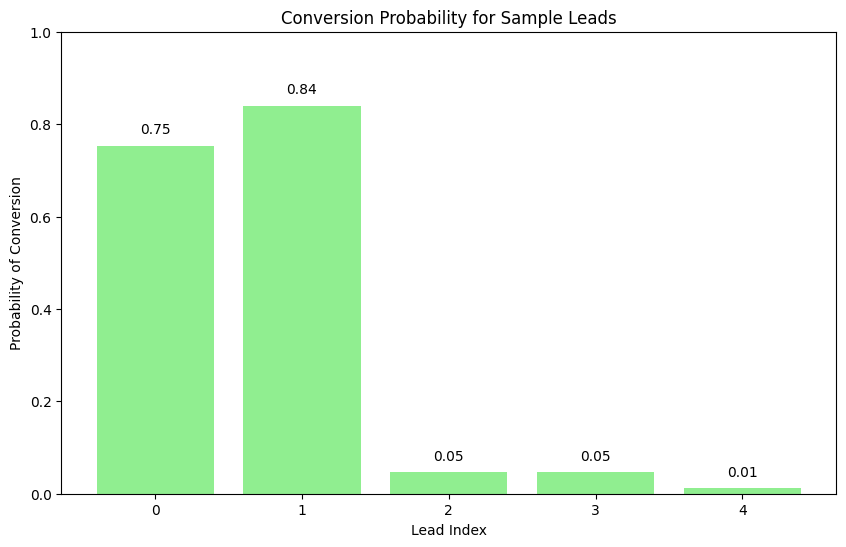


Dashboard Summary:
   Lead Index  Predicted Conversion  Conversion Probability
0           0                     1                0.752982
1           1                     1                0.840109
2           2                     0                0.046441
3           3                     0                0.046378
4           4                     0                0.011873


In [18]:
# Assume 'best_model' is the optimized model from the previous step
# Use the first 5 rows of the test set as a sample
sample_data = X_test.iloc[:5].copy()
sample_predictions = best_model.predict(sample_data)
sample_probabilities = best_model.predict_proba(sample_data)[:, 1]

# Create a DataFrame for the dashboard
dashboard_df = pd.DataFrame({
    'Lead Index': range(5),
    'Predicted Conversion': sample_predictions,
    'Conversion Probability': sample_probabilities
})

# Plot the conversion probabilities
plt.figure(figsize=(10, 6))
bars = plt.bar(dashboard_df['Lead Index'], dashboard_df['Conversion Probability'], color='lightgreen')
plt.title('Conversion Probability for Sample Leads')
plt.xlabel('Lead Index')
plt.ylabel('Probability of Conversion')
plt.ylim(0, 1)
for bar, prob in zip(bars, dashboard_df['Conversion Probability']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{prob:.2f}',
             ha='center', va='bottom')
plt.show()

# Display the dashboard table
print("\nDashboard Summary:")
print(dashboard_df)

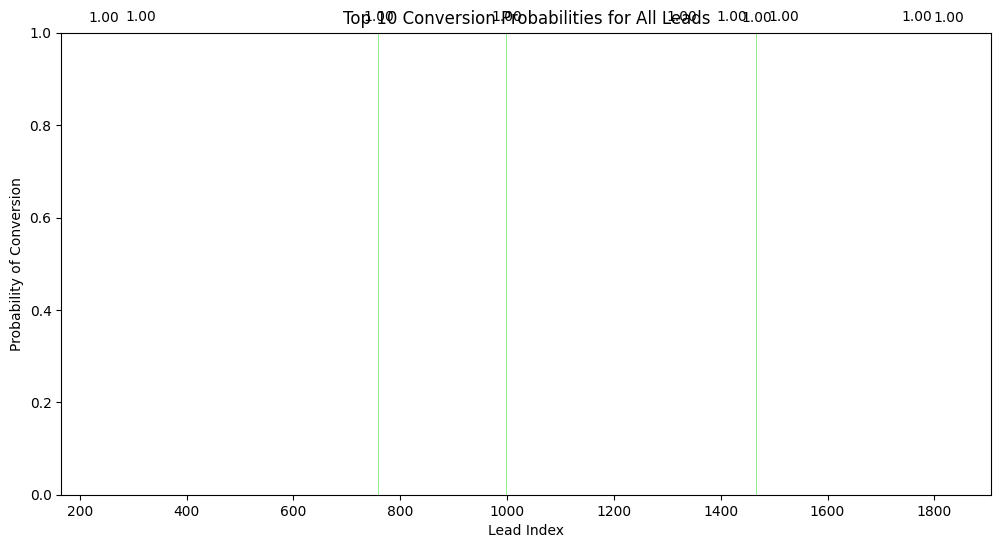


Top 10 Leads Dashboard Summary:
      Lead Index  Predicted Conversion  Conversion Probability
315          315                     1                0.999083
759          759                     1                0.999041
1519        1519                     1                0.999013
1768        1768                     1                0.998998
999          999                     1                0.998840
1421        1421                     1                0.998358
1327        1327                     1                0.998071
245          245                     1                0.997329
1827        1827                     1                0.997237
1467        1467                     1                0.997237


In [19]:
# Use the entire test set
all_predictions = best_model.predict(X_test)
all_probabilities = best_model.predict_proba(X_test)[:, 1]

# Create a DataFrame for the full dashboard
dashboard_df = pd.DataFrame({
    'Lead Index': range(len(X_test)),
    'Predicted Conversion': all_predictions,
    'Conversion Probability': all_probabilities
})

# Sort by Conversion Probability in descending order
dashboard_df = dashboard_df.sort_values(by='Conversion Probability', ascending=False)

# Plot the top 10 leads
plt.figure(figsize=(12, 6))
bars = plt.bar(dashboard_df['Lead Index'][:10], dashboard_df['Conversion Probability'][:10], color='lightgreen')
plt.title('Top 10 Conversion Probabilities for All Leads')
plt.xlabel('Lead Index')
plt.ylabel('Probability of Conversion')
plt.ylim(0, 1)
for bar, prob in zip(bars, dashboard_df['Conversion Probability'][:10]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{prob:.2f}',
             ha='center', va='bottom')
plt.show()

# Display the top 10 leads
print("\nTop 10 Leads Dashboard Summary:")
print(dashboard_df.head(10))

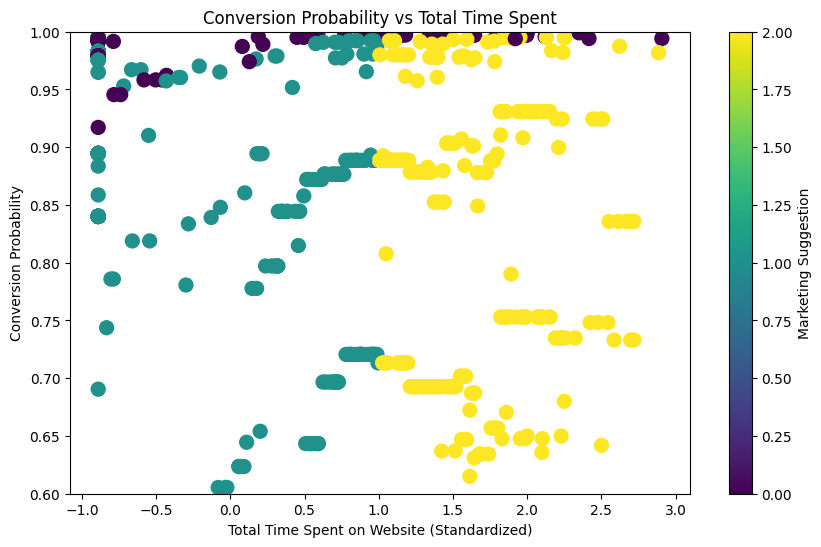


Dashboard for High-Probability Leads (>60%):
      Lead Source_Reference  Last Activity_Olark Chat Conversation  \
7136                    0.0                                    0.0   
7098                    0.0                                    0.0   
8173                    0.0                                    0.0   
6913                    0.0                                    0.0   
693                     0.0                                    0.0   
2533                    0.0                                    0.0   
7753                    0.0                                    0.0   
2378                    0.0                                    0.0   
2989                    0.0                                    0.0   
5720                    0.0                                    0.0   

      Last Activity_SMS Sent  What is your current occupation_Unemployed  \
7136                     0.0                                         0.0   
7098                     0.0   

In [28]:
# Combine test data with predictions
test_data_with_predictions = X_test.copy()
test_data_with_predictions['Predicted Conversion'] = best_model.predict(X_test)
test_data_with_predictions['Conversion Probability'] = best_model.predict_proba(X_test)[:, 1]
test_data_with_predictions['Converted'] = y_test.values  # Actual labels
test_data_with_predictions['Lead Index'] = test_data_with_predictions.index  # Add Lead Index

# Use all 10 features from X_test (assuming X_test contains all original features)
dashboard = test_data_with_predictions.copy()

# Add Marketing Suggestion column
def suggest_marketing(row):
    if row['Tags_Closed by Horizzon'] == 1 and row['Conversion Probability'] > 0.9:
        return 'Follow-up Call'
    elif row['Total Time Spent on Website'] > 1.0:
        return 'Send Email'
    else:
        return 'General Contact'

dashboard['Marketing Suggestion'] = dashboard.apply(suggest_marketing, axis=1)

# Filter high-probability leads and sort
dashboard_high_prob = dashboard[dashboard['Conversion Probability'] > 0.6].sort_values(by='Conversion Probability', ascending=False)

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(dashboard_high_prob['Total Time Spent on Website'], 
                      dashboard_high_prob['Conversion Probability'],
                      c=dashboard_high_prob['Marketing Suggestion'].astype('category').cat.codes,
                      cmap='viridis', s=100)
plt.colorbar(scatter, label='Marketing Suggestion')
plt.title('Conversion Probability vs Total Time Spent')
plt.xlabel('Total Time Spent on Website (Standardized)')
plt.ylabel('Conversion Probability')
plt.ylim(0.6, 1)
plt.show(block=True)

# Display the dashboard
print("\nDashboard for High-Probability Leads (>60%):")
print(dashboard_high_prob.head(10))

<div style="direction: rtl; white-space: pre-wrap; line-height: 1.5;">
# 📊 پروژه SmartLead: سیستم هوشمند امتیازدهی به سرنخ‌های فروش

## 🎯 هدف پروژه
ساخت یک مدل یادگیری ماشین برای پیش‌بینی احتمال تبدیل شدن یک سرنخ (Lead) به مشتری واقعی. این مدل به تیم فروش کمک می‌کند سرنخ‌هایی با ارزش بالا را شناسایی و پیگیری کند.

---

## 🧾 مشخصات داده‌ها
دیتاست شامل ویژگی‌هایی از سرنخ‌ها مانند موارد زیر است:
- منبع سرنخ (Lead Source)
- فعالیت آخر (Last Activity)
- شغل فعلی
- برچسب‌های بازاریابی (Tags)
- زمان سپری‌شده در وب‌سایت
- شهر و کشور
- خروجی هدف: `Converted` (مقدار ۱ یا ۰)

---

## ⚙️ پیش‌پردازش داده‌ها
- جایگزینی مقادیر `'Select'` با `NaN`
- حذف ستون‌هایی با مقادیر گمشده بالا (مثل Lead Quality)
- پر کردن مقادیر گمشده:
  - ستون‌های عددی با میانه
  - ستون‌های متنی با مد
- استفاده از One-Hot Encoding برای دسته‌ای‌ها
- استانداردسازی ویژگی‌های عددی

---

## 🔍 انتخاب ویژگی‌ها (Feature Selection)

با استفاده از `SelectKBest`، ۱۰ ویژگی برتر انتخاب شدند:
- `Lead Source_Reference`
- `Tags_Closed by Horizzon`
- `Tags_Ringing`
- `What is your current occupation_Working Professional`
- `Tags_Will revert after reading the email`
- `What is your current occupation_Unemployed`
- `Last Activity_SMS Sent`
- `Tags_Interested in other courses`
- `Last Activity_Olark Chat Conversation`
- `Total Time Spent on Website`

---

## 🤖 مدل‌های استفاده شده و عملکرد آن‌ها

| مدل                | F1-Score | AUC    |
|--------------------|----------|--------|
| Logistic Regression | 0.798   | 0.895  |
| Random Forest       | 0.767   | 0.878  |
| XGBoost             | **0.793** | **0.913** |

✅ مدل XGBoost بهترین عملکرد را داشت و با GridSearchCV بهینه‌سازی شد.

---

## 🌟 تحلیل اهمیت ویژگی‌ها (XGBoost)

مهم‌ترین ویژگی‌ها در پیش‌بینی تبدیل:
1. `Lead Source_Reference`
2. `Tags_Closed by Horizzon`
3. `Tags_Ringing`
4. شغل سرنخ
5. فعالیت آخر

---

## 📈 داشبورد پیش‌بینی تبدیل

- محاسبه احتمال تبدیل برای هر لید با استفاده از مدل نهایی
- نمایش ۱۰ لید برتر با احتمال >99%
- پیشنهاد بازاریابی: `تماس پیگیری (Follow-up Call)`

---

## ✅ جمع‌بندی

این پروژه:
- لیدهای با ارزش بالا را سریع شناسایی می‌کند
- باعث صرفه‌جویی در زمان تیم فروش می‌شود
- بینش‌های داده‌محور برای تصمیم‌گیری بهتر ارائه می‌دهد

📁 فایل نهایی: `smartlead_lead_scoring.ipynb`

</div>